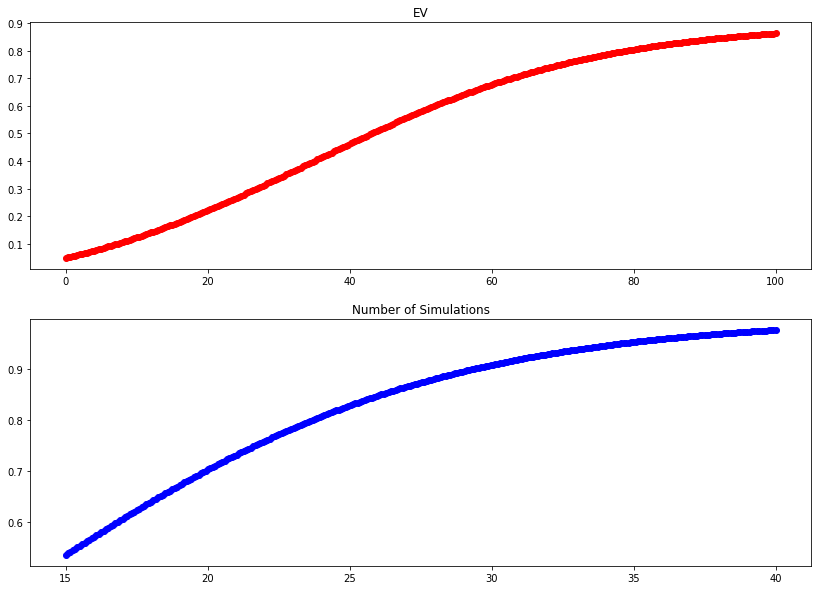

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(14, 10))

sp_weight_func = lambda x: 1/(1 + np.exp((-1*x +35)/20)) - 0.1
sp_in_array = np.linspace(0, 100, 300)
sp_out_array = sp_weight_func(sp_in_array) 

tsp_weight_func = lambda x: 1/(1 + np.exp((-1*x + 14)/7))
tsp_in_array = np.linspace(15, 40, 300)
tsp_out_array = tsp_weight_func(tsp_in_array)

ax[0].title.set_text("EV") 
ax[0].plot(sp_in_array, sp_out_array, color ='red', marker="o")

ax[1].title.set_text("Number of Simulations") 
ax[1].plot(tsp_in_array, tsp_out_array, color ='blue', marker="o") 
plt.show() 

In [2]:
import pandas as pd

MAX_UNIT = 300
num_sims = [20, 30, 40]
ev = [10, 20, 40, 60, 80]

df = pd.DataFrame()
for i in ev:
    df[i] = 'N/A'
    for j in num_sims:
        df.at[j, i] = MAX_UNIT * sp_weight_func(i) * tsp_weight_func(j)
display(df)

10       20       40       60       80
20  43.0716  77.5153  162.239  237.754  282.458
30  55.6867  100.218  209.756  307.388  365.185
40  59.8904  107.784   225.59  330.592  392.753

In [8]:
MAX_UNIT = 250

sims = 34
z = 69
odds = 100/125

ev = (z)*(odds + 1) - 100

bet = MAX_UNIT * sp_weight_func(ev) * tsp_weight_func(sims)
print('EV:', round(ev, 2))
print('Bet:', round(bet, 2))

EV: 33.2
Bet: 60.32


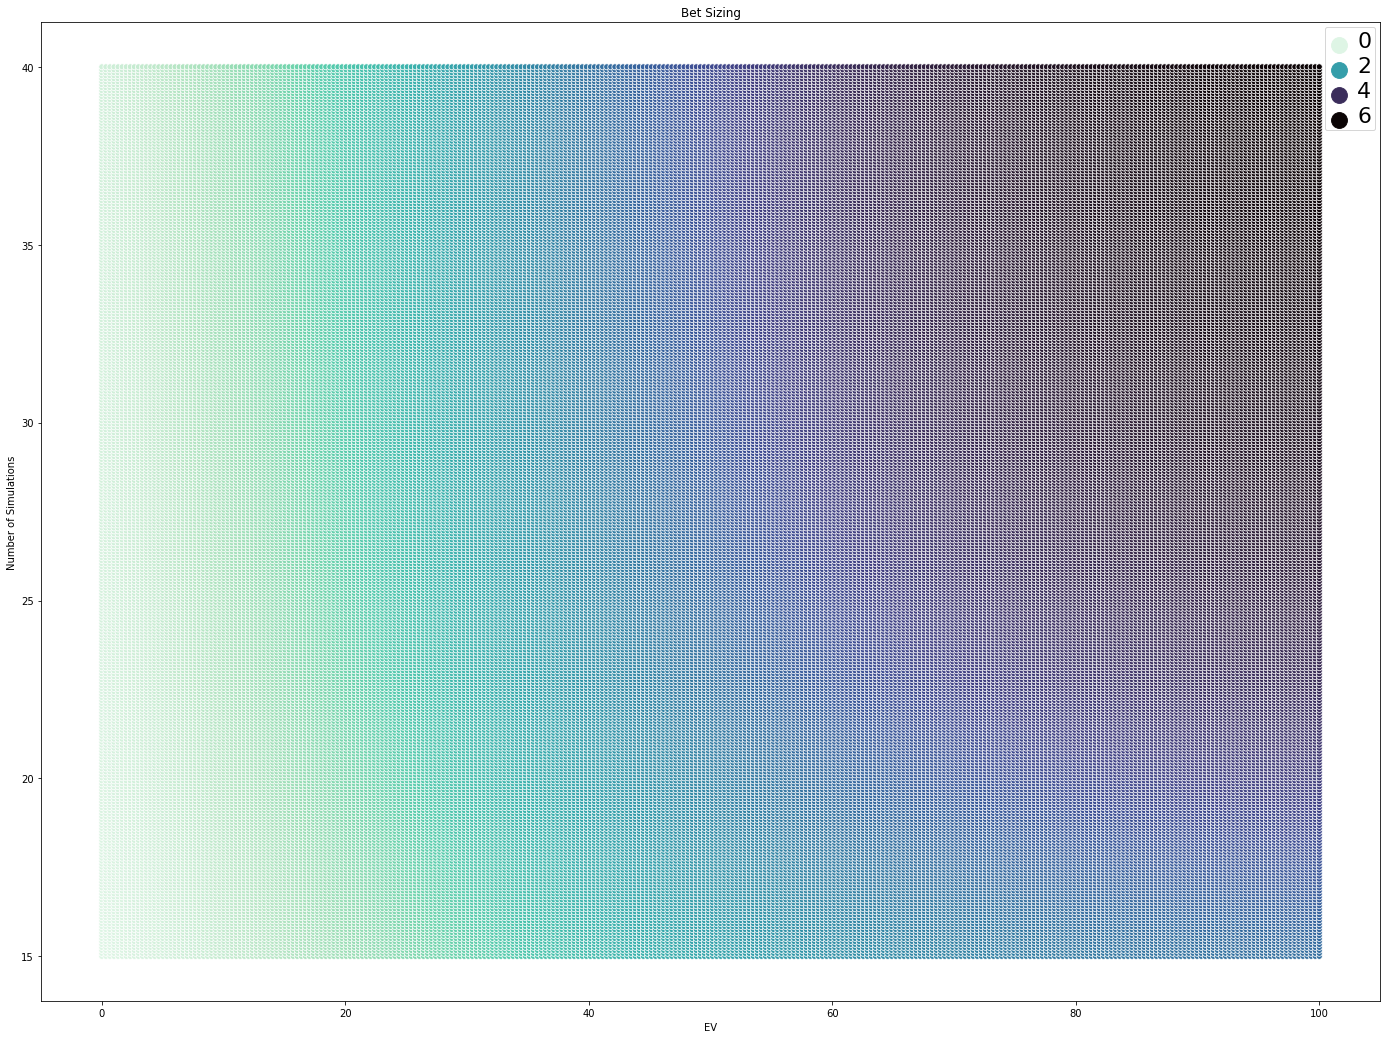

In [4]:
import seaborn as sns

MAX_UNIT = 6

plt.rcParams["figure.figsize"] = (24, 18)
t = [(i, j, MAX_UNIT*sp_weight_func(i)*tsp_weight_func(j)) for i in sp_in_array for j in tsp_in_array]
ax = sns.scatterplot([i[0] for i in t], [i[1] for i in t], hue=[i[2] for i in t], palette='mako_r')
ax.set(xlabel="EV", ylabel="Number of Simulations", title="Bet Sizing")
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
for lh in ax.get_legend().legendHandles: 
    lh._sizes = [250] 
plt.show()

In [5]:
# misc
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
import requests

date = '01/10/2020'
SLATES_URL = 'https://resultsdb-api.rotogrinders.com/api/slates/5e209fd9ffd6d958beaf1f4c/summary'
slate_data = requests.get(SLATES_URL).json()

# print(slate_data)
print(slate_data['winnerMap']['5e209fdfe79fe658b8e5c431'])

{'winners': [{'siteEntryName': 'cb1umthal'}], 'score': 274.13, 'cashLine': 245.5}


In [41]:
%%time

import requests
import math
import pprint

contest_id = '5c64b00d26d7e0094f7a6e09'
prizes = {}
prev_prize = None

index = 0
while True:
    ENTRY_URL = 'https://resultsdb-api.rotogrinders.com/api/entries?_contestId={}&index={}'.format(contest_id, str(index))
    entry_data = requests.get(ENTRY_URL).json()['entries']

    for entry in entry_data:
        rank = entry['rank']
        points = entry['points']
        if 'prize' in entry:
            prize = entry['prize']['cash']
        else:
            prize = 0

        if prize not in prizes:
            prizes[prize] = {}
            prizes[prize]['MAXPOINTS'] = points
            prizes[prize]['MINRANK'] = rank
            
            if prev_prize is not None:
                prizes[prev_prize]['MINPOINTS'] = prev_points
                prizes[prev_prize]['MAXRANK'] = prev_rank
            
        prev_prize = prize
        prev_rank = rank
        prev_points = points
        
    if prize == 0:
        prizes[prize]['MINPOINTS'] = None
        prizes[prize]['MAXRANK'] = None
        break
        
    index += 1

pp = pprint.PrettyPrinter()
pp.pprint(prizes)

{0: {'MAXPOINTS': 314.25, 'MAXRANK': None, 'MINPOINTS': None, 'MINRANK': 8149},
 20: {'MAXPOINTS': 330.25,
      'MAXRANK': 8050,
      'MINPOINTS': 314.5,
      'MINRANK': 3301},
 22.69: {'MAXPOINTS': 330.5,
         'MAXRANK': 3247,
         'MINPOINTS': 330.5,
         'MINRANK': 3247},
 25: {'MAXPOINTS': 338.75,
      'MAXRANK': 3206,
      'MINPOINTS': 330.75,
      'MINRANK': 1804},
 25.33: {'MAXPOINTS': 339, 'MAXRANK': 1774, 'MINPOINTS': 339, 'MINRANK': 1774},
 30: {'MAXPOINTS': 345.75,
      'MAXRANK': 1739,
      'MINPOINTS': 339.25,
      'MINRANK': 1035},
 33.59: {'MAXPOINTS': 346, 'MAXRANK': 1003, 'MINPOINTS': 346, 'MINRANK': 1003},
 35: {'MAXPOINTS': 350.75, 'MAXRANK': 988, 'MINPOINTS': 346.25, 'MINRANK': 686},
 35.45: {'MAXPOINTS': 351, 'MAXRANK': 675, 'MINPOINTS': 351, 'MINRANK': 675},
 40: {'MAXPOINTS': 355, 'MAXRANK': 659, 'MINPOINTS': 351.25, 'MINRANK': 484},
 41.36: {'MAXPOINTS': 355.25,
         'MAXRANK': 473,
         'MINPOINTS': 355.25,
         'MINRANK': 473},